### Metadata

    Loan_ID: Unique ID for each loan application.

    Gender: Gender of the applicant (Male/Female).

    Married: Marital status (Yes/No).

    Dependents: Number of dependents (0, 1, 2, 3+).

    Education: Education level (Graduate/Not Graduate).

    Self_Employed: Self-employment status (Yes/No).

    ApplicantIncome: Income of the applicant.

    CoapplicantIncome: Income of the co-applicant.

    LoanAmount: Loan amount requested.

    Loan_Amount_Term: Term of the loan in months.

    Credit_History: Credit history meets guidelines (1 = Yes, 0 = No).

    Property_Area: Location of the property (Urban/Rural/Semiurban).

    Loan_Status: Loan approval status (Y = Yes, N = No).

### Import Libraries

In [20]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [1]:
import pandas as pd 
import numpy as np

In [ ]:
train = pd.read_csv()

### Load the Data

In [21]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

# Display basic information
print("Training Data Preview:")
train_df.head()

Training Data Preview:


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Perform EDA

In [22]:
# Check for missing values
print("\nMissing values in training data:")
print(train_df.isnull().sum())

print("\nMissing values in test data:")
print(test_df.isnull().sum())


Missing values in training data:
Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values in test data:
Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


In [23]:
# Summary statistics
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


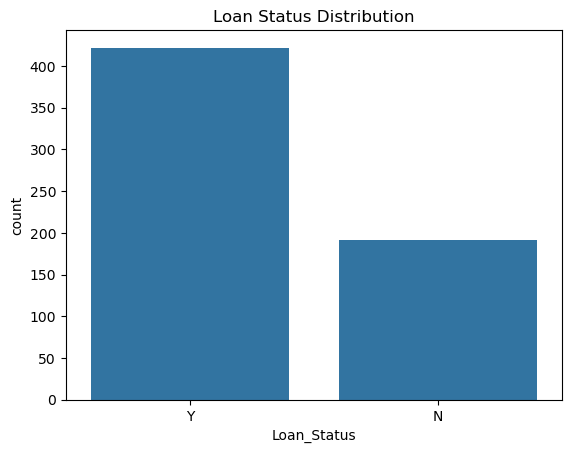

In [24]:
# Check the distribution of the target variable
sns.countplot(x='Loan_Status', data=train_df)
plt.title('Loan Status Distribution')
plt.show()

### Data Cleaning
### Handle Missing Values

In [25]:
# Fill missing categorical values with mode
categorical_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']
for col in categorical_cols:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

# Fill missing numerical values with median
train_df['LoanAmount'] = train_df['LoanAmount'].fillna(train_df['LoanAmount'].median())
test_df['LoanAmount'] = test_df['LoanAmount'].fillna(test_df['LoanAmount'].median())

### Encode Categorical Variables
### Correlation Heatmap

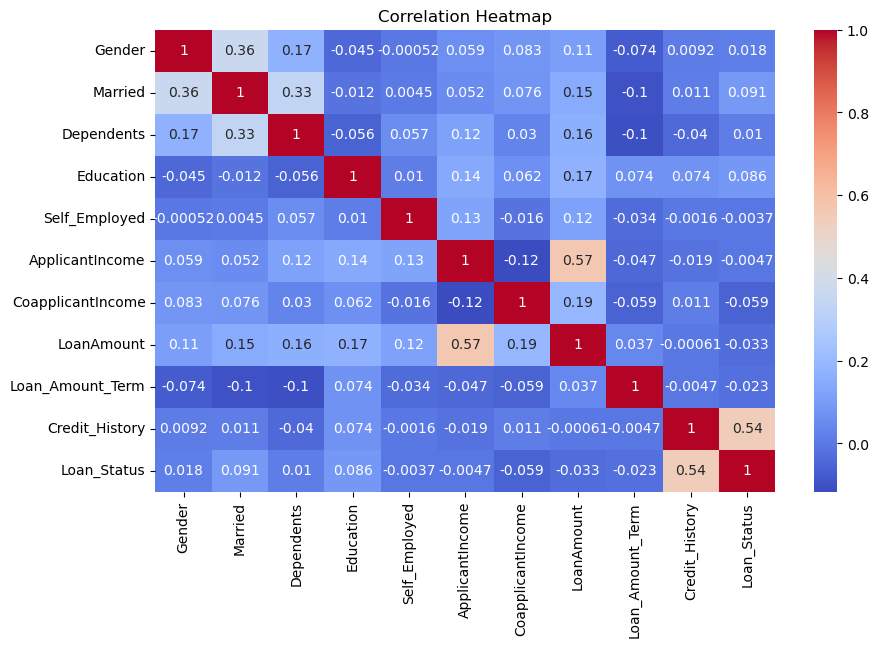

In [26]:
# Encode categorical variables as numbers where appropriate
train_df['Gender'] = train_df['Gender'].map({'Male': 1, 'Female': 0})
train_df['Married'] = train_df['Married'].map({'Yes': 1, 'No': 0})
train_df['Education'] = train_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
train_df['Self_Employed'] = train_df['Self_Employed'].map({'Yes': 1, 'No': 0})
train_df['Loan_Status'] = train_df['Loan_Status'].map({'Y': 1, 'N': 0})
train_df['Dependents'] = train_df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})

# Use one-hot encoding for Property_Area
train_df = pd.get_dummies(train_df, columns=['Property_Area'], drop_first=True)

# Repeat encoding for test data
test_df['Gender'] = test_df['Gender'].map({'Male': 1, 'Female': 0})
test_df['Married'] = test_df['Married'].map({'Yes': 1, 'No': 0})
test_df['Education'] = test_df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
test_df['Self_Employed'] = test_df['Self_Employed'].map({'Yes': 1, 'No': 0})
test_df['Dependents'] = test_df['Dependents'].map({'0': 0, '1': 1, '2': 2, '3+': 3})
test_df = pd.get_dummies(test_df, columns=['Property_Area'], drop_first=True)


# Drop non-numeric columns before computing correlation
numeric_df = train_df.select_dtypes(include=[np.number])

# Plot the correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [27]:
### Pairplot for Numerical Features

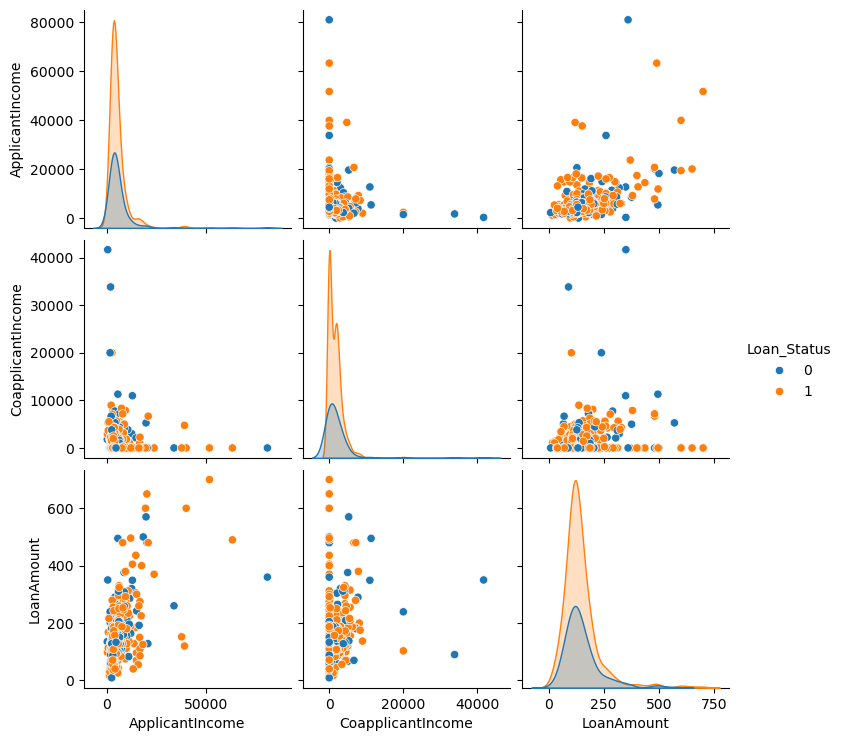

In [28]:
# Pairplot for numerical features
sns.pairplot(train_df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status']], hue='Loan_Status')
plt.show()

### Model Training
### Split Data into Features and Target

In [29]:
# Define features and target variable
X = train_df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = train_df['Loan_Status']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### Train Logistic Regression Model

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_val = scaler.transform(X_val)

model = LogisticRegression(solver='saga', max_iter=500)
model.fit(X_train, y_train)

# Predict on validation set
y_pred = model.predict(X_val)

### Model Evaluation
### Confusion Matrix

Validation Accuracy: 0.7886


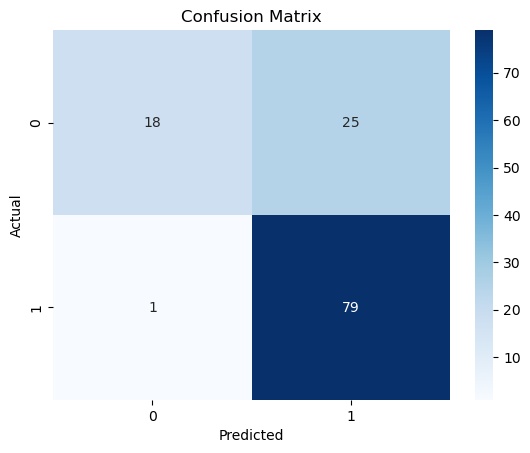

In [31]:
# Model evaluation
conf_matrix = confusion_matrix(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
print(f'Validation Accuracy: {accuracy:.4f}')

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
# Accuracy score
accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.79


### Predictions on Test Data

In [33]:
# Prepare test data for predictions (drop Loan_ID)
test_X = test_df.drop(['Loan_ID'], axis=1)

# Ensure test data is scaled using the same StandardScaler instance
test_X = scaler.transform(test_X)  # Convert to scaled NumPy array

# Make predictions
test_predictions = model.predict(test_X)

# Add predictions to test data
test_df['Predicted_Loan_Status'] = test_predictions

# Map numerical predictions back to 'Y' and 'N'
test_df['Predicted_Loan_Status'] = test_df['Predicted_Loan_Status'].map({1: 'Y', 0: 'N'})

### Save Predictions

In [34]:
# Save predictions to CSV
test_df[['Loan_ID', 'Predicted_Loan_Status']].to_csv('loan_predictions.csv', index=False)

print("Predictions saved successfully!")

test_df

Predictions saved successfully!


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area_Semiurban,Property_Area_Urban,Predicted_Loan_Status
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,False,True,Y
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,False,True,Y
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,False,True,Y
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,False,True,Y
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,False,True,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,1,1,3,0,1,4009,1777,113.0,360.0,1.0,False,True,Y
363,LP002975,1,1,0,1,0,4158,709,115.0,360.0,1.0,False,True,Y
364,LP002980,1,0,0,1,0,3250,1993,126.0,360.0,1.0,True,False,Y
365,LP002986,1,1,0,1,0,5000,2393,158.0,360.0,1.0,False,False,Y


### Save the Trained Model

In [35]:
import joblib

# Save the trained model
joblib.dump(model, 'loan_approval_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']